## Example for reading 3DPOP Image Dataset

The dataset can be accessed with the dataloader class, by specifying the path to the dataset, the metadata csv and the sequence of interest

In [1]:
##Import Classes
import matplotlib.pyplot as plt
import cv2
import sys
import os
sys.path.append("../")
from POP3D_Reader.ImageReader import ImageReader

In [2]:
##Specify Parameters:
DatasetPath = "/home/alexchan/Documents/3D-MuPPET/TrainingData/N6000" #Put absolute paths here
JSONPath = "/home/alexchan/Documents/3D-MuPPET/TrainingData/N6000/Annotation/Train-3D.json"

In [3]:
##Load Reader:
DataReader =  ImageReader(JSONPath,DatasetPath, Type = "3D")

Loading JSON...
Sampled 3D ground truth Data from 3D-POP dataset
Collated by: Alex Chan on: 07/07/2023
Total Images: 6036


In [4]:
##Print Dataset Information:
DataReader.PrintInfo()

Loading JSON...
Sampled 3D ground truth Data from 3D-POP dataset
Collated by: Alex Chan on: 07/07/2023
Total Images: 6036


In [5]:
## Total Number of images:
len(DataReader.data["Annotations"])

6036

#### Getting image path using index:

['Train/Cam1/Sequence59_n10_28062022-F10125.jpg', 'Train/Cam2/Sequence59_n10_28062022-F10125.jpg', 'Train/Cam3/Sequence59_n10_28062022-F10125.jpg', 'Train/Cam4/Sequence59_n10_28062022-F10125.jpg']


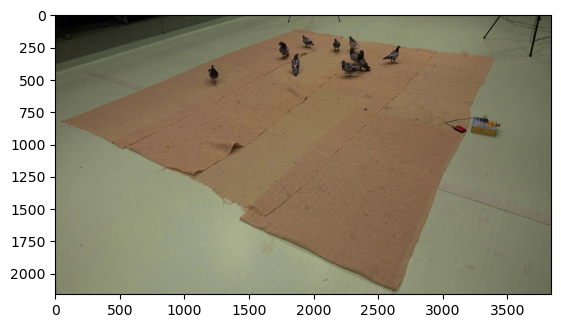

In [6]:
%matplotlib inline
Index = 3000
ImgPath = DataReader.GetImagePath(Index)
print(ImgPath) #note they are relative paths!

##Visualize it
img = cv2.imread(os.path.join(DatasetPath,ImgPath[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


#### Getting calibration parameters:

In [7]:
cameraMatrix,distCoeffs = DataReader.GetIntrinsics(Index)
rvec,tvec = DataReader.GetExtrinsics(Index)

print("Intrinsic Matrix (for each camera):"); print(cameraMatrix)
print("\n")

print("Distortion Coefficients (for each camera):"); print(distCoeffs)
print("\n")

print("Extrinsics Rotation (for each camera):"); print(rvec)
print("\n")

print("Extrinsics Translation (for each camera):"); print(tvec)


Intrinsic Matrix (for each camera):
[array([[2.61956713e+03, 0.00000000e+00, 1.87694286e+03],
       [0.00000000e+00, 2.61073443e+03, 1.06469336e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), array([[2.62491156e+03, 0.00000000e+00, 1.91615534e+03],
       [0.00000000e+00, 2.61930167e+03, 1.07529060e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), array([[2.61348320e+03, 0.00000000e+00, 1.88471789e+03],
       [0.00000000e+00, 2.60755529e+03, 1.08120230e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), array([[2.61283738e+03, 0.00000000e+00, 1.90301846e+03],
       [0.00000000e+00, 2.60185014e+03, 1.07517190e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])]


Distortion Coefficients (for each camera):
[array([[ 0.03334199, -0.0933262 , -0.00170997, -0.00541754,  0.11006885]]), array([[ 0.03135099, -0.02665789,  0.00164689,  0.00367709,  0.00472327]]), array([[ 0.02653671, -0.05971209, -0.00057282, -0.0029398 ,  0.04838836]]

#### Getting ground truth data using index:

In [8]:
Index = 0
print("Bounding Boxes:"); print(DataReader.ExtractBBox(Index))
print("\n")

print("2D Keypoints:"); print(DataReader.Extract2D(Index))
print("\n")

print("3D Keypoints:"); print(DataReader.Extract3D(Index))


Bounding Boxes:
[{'452_0107': [2807.54443359375, 71.65255737304688, 2972.207275390625, 271.00946044921875]}, {'452_0107': [1165.696533203125, 1.063861846923828, 1332.234375, 196.95867919921872]}, {'452_0107': [199.14630126953125, 1109.9439697265625, 472.21099853515625, 1441.3656005859375]}, {'452_0107': [2898.33544921875, 1333.63818359375, 3179.87841796875, 1710.1929931640625]}]


2D Keypoints:
[{'452_0107': {'bp_leftShoulder': [2912.207275390625, 166.13204956054688], 'bp_rightShoulder': [2867.54443359375, 166.43582153320312], 'bp_topKeel': [2887.615478515625, 186.2932891845703], 'bp_bottomKeel': [2887.815185546875, 211.00946044921875], 'bp_tail': [2892.241455078125, 178.82916259765625], 'hd_beak': [2871.802978515625, 132.37411499023438], 'hd_nose': [2878.4130859375, 123.52396392822266], 'hd_leftEye': [2889.83154296875, 119.74120330810548], 'hd_rightEye': [2880.1396484375, 117.78473663330078]}}, {'452_0107': {'bp_leftShoulder': [1272.234375, 88.34048461914062], 'bp_rightShoulder': [123

#### Finally, to visualize and check annotations:

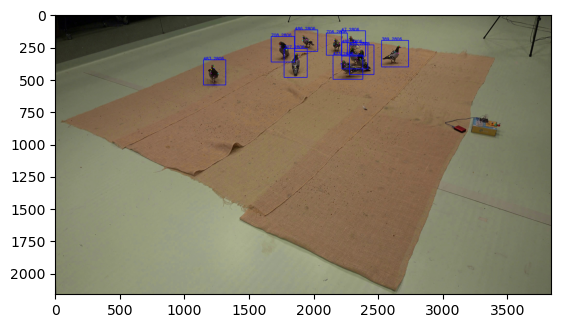

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   4],
        [  0,   0,   4],
        [  0,   0,   4]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   4],
        [  0,   0,   4],
        [  0,   0,   4]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   4],
        [  0,   0,   4],
        [  0,   0,   4]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   2],
        ...,
        [105, 108,  87],
        [105, 108,  87],
        [105, 108,  87]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   2],
        ...,
        [105, 108,  87],
        [105, 108,  87],
        [105, 108,  87]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   2],
        ...,
        [105, 108,  87],
        [105, 108,  87],
        [105, 108,  87]]

In [11]:
Index = 3000
DataReader.CheckAnnotations(Index,show=False, jupyter=True)